In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random

In [2]:
%run -i ./Classes.ipynb

# Embed, Attack, Extract

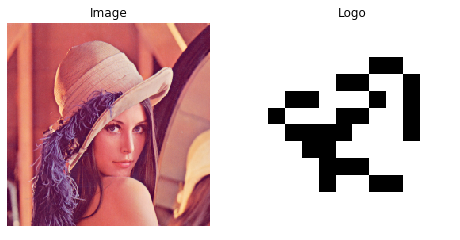

In [66]:
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 256
logo_size = 12

my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show([[my_image.image, my_logo.logo]], [['Image', 'Logo']])

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 34.30632542019952


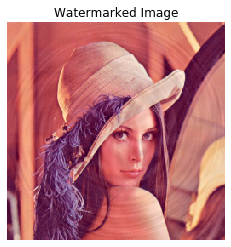

In [67]:
riw = RIW(image_size, logo_size, 24, 0.5, 12)
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)
w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, 'Watermarked Image')

'Transform PCET: [####################] 100.0%'

BER = 0.00%


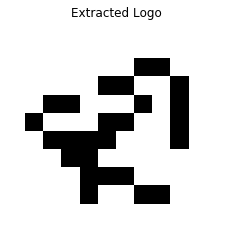

In [68]:
logo_extracted = riw.extract(w_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_extracted)))

ImageUtil.show1(logo_extracted, 'Extracted Logo')

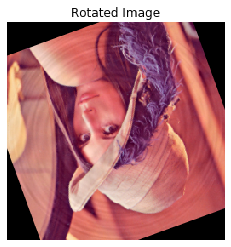

In [5]:
# Attack

rotated_image = Attacker.attackRotate(w_image.image, -160)
a_image = Image(rotated_image, w_image.image_size)

# translated_image = Attacker.attackTranslateByPixel(w_image.image, -9, 5)
# a_image = Image(translated_image, w_image.image_size)

ImageUtil.show1(a_image.image, 'Rotated Image')

'Calculate Center: [####################] 100.0%'

1 1 1


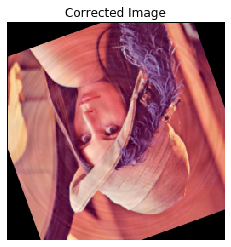

In [6]:
%run -i ./Classes.ipynb
(correction_x, correction_y, correction_s) = AntiTranslation.calculate_center(w_image.image, a_image.image)
print(correction_x, correction_y, correction_s)
corrected_image = Attacker.attackTranslateByPixel(a_image.image, correction_x, correction_y)
c_image = Image(corrected_image, a_image.image_size)
ImageUtil.show1(c_image.image, 'Corrected Image')

'Transform PCET: [####################] 100.0%'

BER = 36.81%


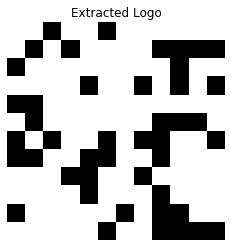

In [54]:
logo_extracted = riw.extract(c_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_extracted)))

ImageUtil.show1(logo_extracted, 'Extracted Logo')

# Exploring PSNR

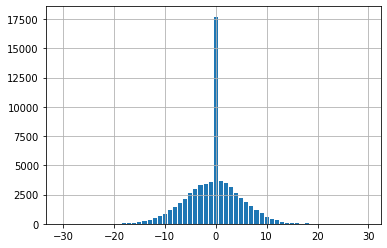

In [8]:
# Histogram of Compensation Image

fig_histogram = plt.figure()
(yaxis, xaxis) = np.histogram(riw.img_compensation.flatten(), bins=np.linspace(-30, 30, 61))
xaxis = xaxis[0:len(yaxis)]
plt.bar(xaxis, yaxis)
plt.grid()
plt.show()

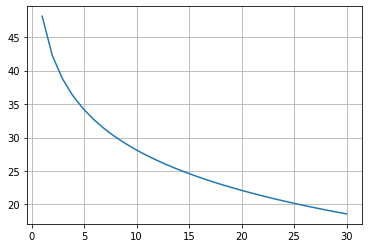

In [9]:
# Graph of PSNR

fig_psnr = plt.figure()
xaxis_psnr = np.linspace(1, 30, 31)
plt.plot(xaxis_psnr, 10 * np.log10(255 ** 2 / xaxis_psnr ** 2))
plt.grid()
plt.show()

(-22.40025277751986-7.66053886991358e-15j) (20.219511481649384+2.5673907444456745e-15j)
(-1.2200159812958411e-08+4.540488409474761e-19j)
(-2.50000001220016+4.540488409474761e-19j) (2.49999998779984+4.540488409474761e-19j)
(-2.50000001220016+4.540488409474761e-19j) (2.49999998779984+4.540488409474761e-19j)
(42.368764328806606-8.614384078539661e-17j)


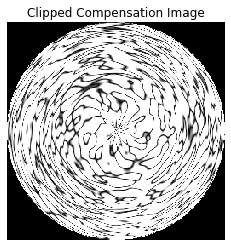

In [50]:


imc = np.copy(riw.img_compensation)
print(np.min(imc), np.max(imc))
imc_mean = np.mean(imc)
radius = 2.5
imc = np.clip(imc, imc_mean - radius, imc_mean + radius)

print(imc_mean)
print(imc_mean - radius, imc_mean + radius)
print(np.min(imc), np.max(imc))
print(10 * ( np.log10(255 * 255) - np.log10(np.mean(imc ** 2)) ) )

ImageUtil.show1(imc, 'Clipped Compensation Image')

PSNR = 42.36876432880662


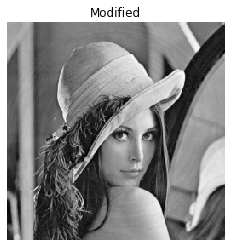

In [51]:
img_mod = my_image.get_y() + imc

print('PSNR = {}'.format(ImageUtil.psnr(my_image.get_y(), img_mod)))

ImageUtil.show1(img_mod, 'Modified')

'Transform PCET: [####################] 100.0%'

BER = 31.94%


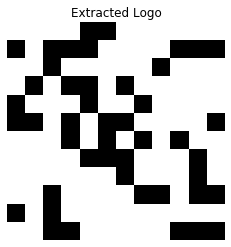

In [52]:
logo_mod = riw.extract(img_mod)

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_mod)))

ImageUtil.show1(logo_mod, 'Extracted Logo')

# Exploring Anti Rotation

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

BER = 1.39%


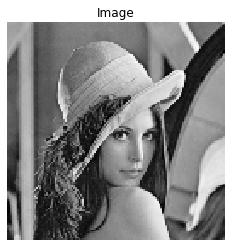

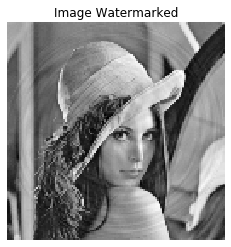

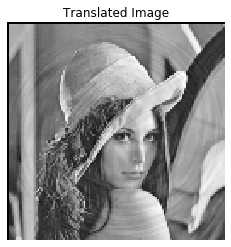

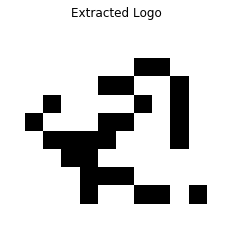

In [41]:
def antirotation1():
    # Resize Original Image
    img_y = my_image.get_y()

    ImageUtil.show1(img_y, 'Image')

    # Embed
    riw3 = RIW(image_size, logo_size, 24, 0.5, 12)
    img_c = riw3.generate_compensation(img_y, my_logo.logo)
    img_y_w = np.abs(img_y +  img_c).astype('uint8')

    ImageUtil.show1(img_y_w, 'Image Watermarked')


    # Translation
    ds = 1
    img_t = np.zeros((image_size, image_size)).astype('uint8')
    img_t[ds:,ds:] = img_y_w[:image_size-ds, :image_size-ds]

    ImageUtil.show1(img_t, 'Translated Image')


    # Extract
    riw4 = RIW(256, logo_size, 24, 0.5, 12)
    img_t_2 = cv2.resize(img_y_w, (256, 256))
    e_logo = riw4.extract(img_t_2)

    ImageUtil.show1(e_logo, 'Extracted Logo')
    print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, e_logo)))

antirotation1()

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

BER = 1.39%


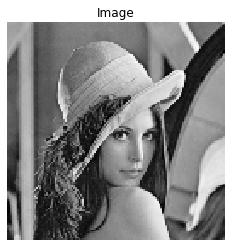

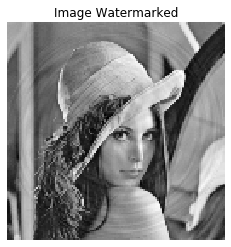

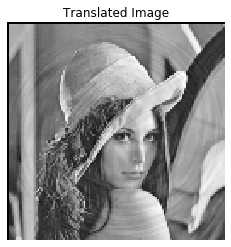

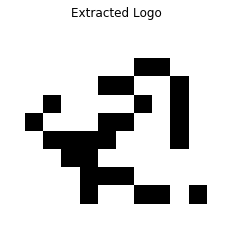

In [40]:
def antirotation2():
    # Resize Original Image
    img_y = my_image.get_y()

    ImageUtil.show1(img_y, 'Image')

    # Embed
    riw3 = RIW(image_size, logo_size, 24, 0.5, 12)
    img_c = riw3.generate_compensation(img_y, my_logo.logo)
    img_y_w = np.abs(img_y +  img_c).astype('uint8')

    ImageUtil.show1(img_y_w, 'Image Watermarked')


    # Translation
    ds = 1
    img_t = np.zeros((image_size, image_size)).astype('uint8')
    img_t[ds:,ds:] = img_y_w[:image_size-ds, :image_size-ds]

    ImageUtil.show1(img_t, 'Translated Image')


    # Extract
    riw4 = RIW(256, logo_size, 24, 0.5, 12)
    img_t_2 = cv2.resize(img_y_w, (256, 256))
    e_logo = riw4.extract(img_t_2)

    ImageUtil.show1(e_logo, 'Extracted Logo')
    print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, e_logo)))
    
antirotation2()

# Combination Attacks

In [17]:
for i in [1, 2, 3]:
    print(i)

1
2
3
